In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


- Connect to factbook.db and use pandas.read_sql_query() to return information on the tables in the database.

In [17]:
conn = sqlite3.connect(r'C:\Users\mikel\OneDrive\Desktop\Python\SQL\factbook.db')
cursor = conn.cursor()
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q,conn) #Reads query into table

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


- Write and run another query that returns the first 5 rows of the facts table in the database.

In [18]:
q1 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q1,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


# Summary Statistics
- minimum population
- maximum population
- minimum population growth
- maximum population growth

In [20]:
q2 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q2,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


# Outliers

In [35]:
q3 = "SELECT * FROM facts WHERE population == (SELECT MIN(population) FROM facts)"
pd.read_sql_query(q3,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [34]:
q4 = "SELECT * FROM facts WHERE population == (SELECT MAX(population) FROM facts)"
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


Anartica has 280,000 squared miles with no population growth and no birth growth
The world has a population close to 7.3 billion with a birth rate higher than the death rate that is reflected upon population_growth. 

# Histograms
- Using just the non-outlier rows, generate a 2 by 2 grid of histograms for the following columns:
        - population
        - population_growth
        - birth_rate
        - death_rate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE3C02CBA8>,
      dtype=object)

<Figure size 720x720 with 0 Axes>

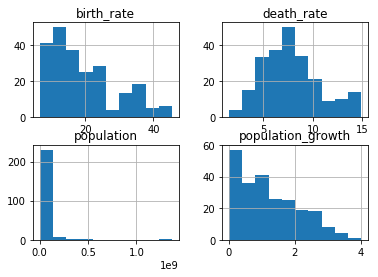

In [44]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
q6 = "select population, population_growth, birth_rate, death_rate from facts where population != (select max(population) from facts) and population != (select min(population) from facts);"
pd.read_sql_query(q6, conn).hist(ax=ax)

# Which countries have the highest population density?
density = cast(population as float)/cast(area as float)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE3DCBEC18>]],
      dtype=object)

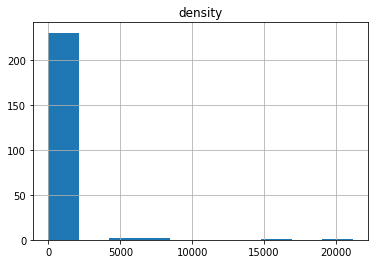

In [52]:
q7 = "SELECT name, CAST(population as float)/CAST(area as float) density FROM facts ORDER BY density DESC;"
pd.read_sql_query(q7,conn).hist()

In [61]:
q8 = "SELECT name, MAX(CAST(population as float)/CAST(area as float)) density FROM facts ORDER BY density DESC"
pd.read_sql_query(q8, conn)

,name,density
0,Macau,21168.964286


Macau has the largest density (population/area)

In [62]:
conn.close()